# Module 3

# Loading Packages

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker

%matplotlib notebook

#Linear Regression
from sklearn import linear_model

#used for 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from scipy.optimize import minimize

#igore warning
import warnings
warnings.filterwarnings("ignore")

# Reading data and preprocessing

In [2]:
df = pd.read_csv('swapLiborData.csv')

#convert number to datatime format
for i in range(df.shape[0]):
    df.loc[i,'Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df.loc[i,'Date'],'D')
    
df.head(5)

Date  US0001M  US0002M  US0003M  US0006M  US0012M   USSW2  \
0  2014-01-02 00:00:00   0.1683  0.21250  0.24285   0.3464   0.5826  0.4903   
1  2014-01-03 00:00:00   0.1647  0.20995  0.23985   0.3452   0.5846  0.5113   
2  2014-01-06 00:00:00   0.1625  0.20825  0.23935   0.3445   0.5854  0.5000   
3  2014-01-07 00:00:00   0.1615  0.20820  0.24210   0.3447   0.5866  0.4985   
4  2014-01-08 00:00:00   0.1610  0.20750  0.24040   0.3452   0.5856  0.5350   

    USSW3   USSW5   USSW7  USSW10  USSW15  USSW30  
0  0.8705  1.7740  2.4540  3.0610  3.5613  3.8950  
1  0.9000  1.7920  2.4648  3.0665  3.5635  3.8953  
2  0.8760  1.7468  2.4203  3.0260  3.5315  3.8738  
3  0.8735  1.7375  2.4065  3.0098  3.5145  3.8580  
4  0.9520  1.8280  2.4835  3.0650  3.5500  3.8703

# LIBOR Curves

<IPython.core.display.Javascript object>


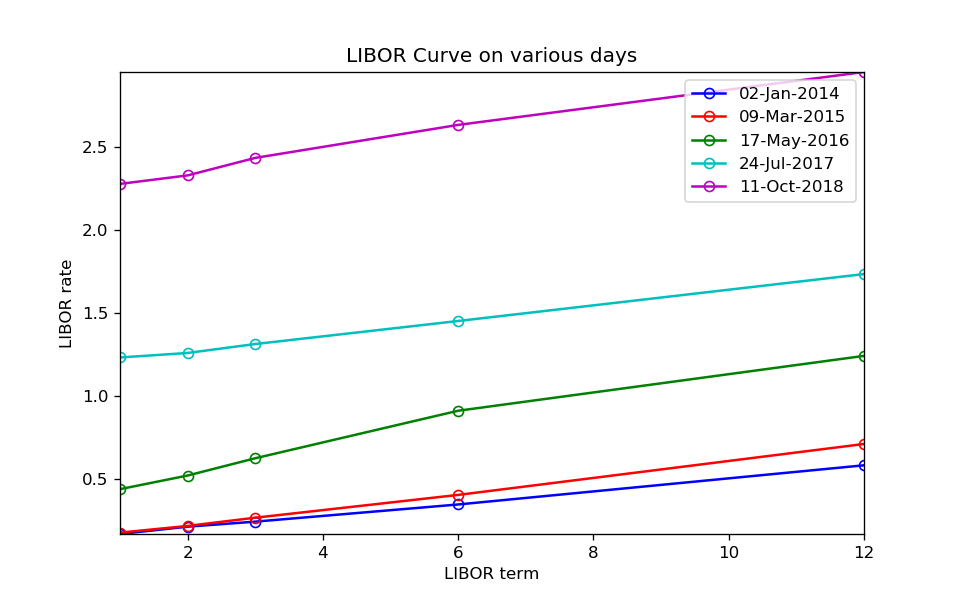

In [3]:
#plot data
plt.figure(figsize=(8,5)) # set the figure size
plt.plot([1, 2, 3, 6 ,12], df.iloc[0,1:6], 'bo-', markerfacecolor='None')
plt.plot([1, 2, 3, 6 ,12], df.iloc[299,1:6], 'ro-', markerfacecolor='None')
plt.plot([1, 2, 3, 6 ,12], df.iloc[599,1:6], 'go-', markerfacecolor='None')
plt.plot([1, 2, 3, 6 ,12], df.iloc[899,1:6], 'co-', markerfacecolor='None')
plt.plot([1, 2, 3, 6 ,12], df.iloc[-1,1:6], 'mo-', markerfacecolor='None')

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('LIBOR term')
plt.ylabel('LIBOR rate')
plt.title('LIBOR Curve on various days')

plt.legend(labels = [df.iloc[0,0].strftime('%d-%b-%Y'), \
                     df.iloc[299,0].strftime('%d-%b-%Y'), \
                     df.iloc[599,0].strftime('%d-%b-%Y'), \
                     df.iloc[899,0].strftime('%d-%b-%Y'), \
                     df.iloc[-1,0].strftime('%d-%b-%Y'), \
                     ], loc='best')

plt.show()

# Market LIBOR Rates

<IPython.core.display.Javascript object>


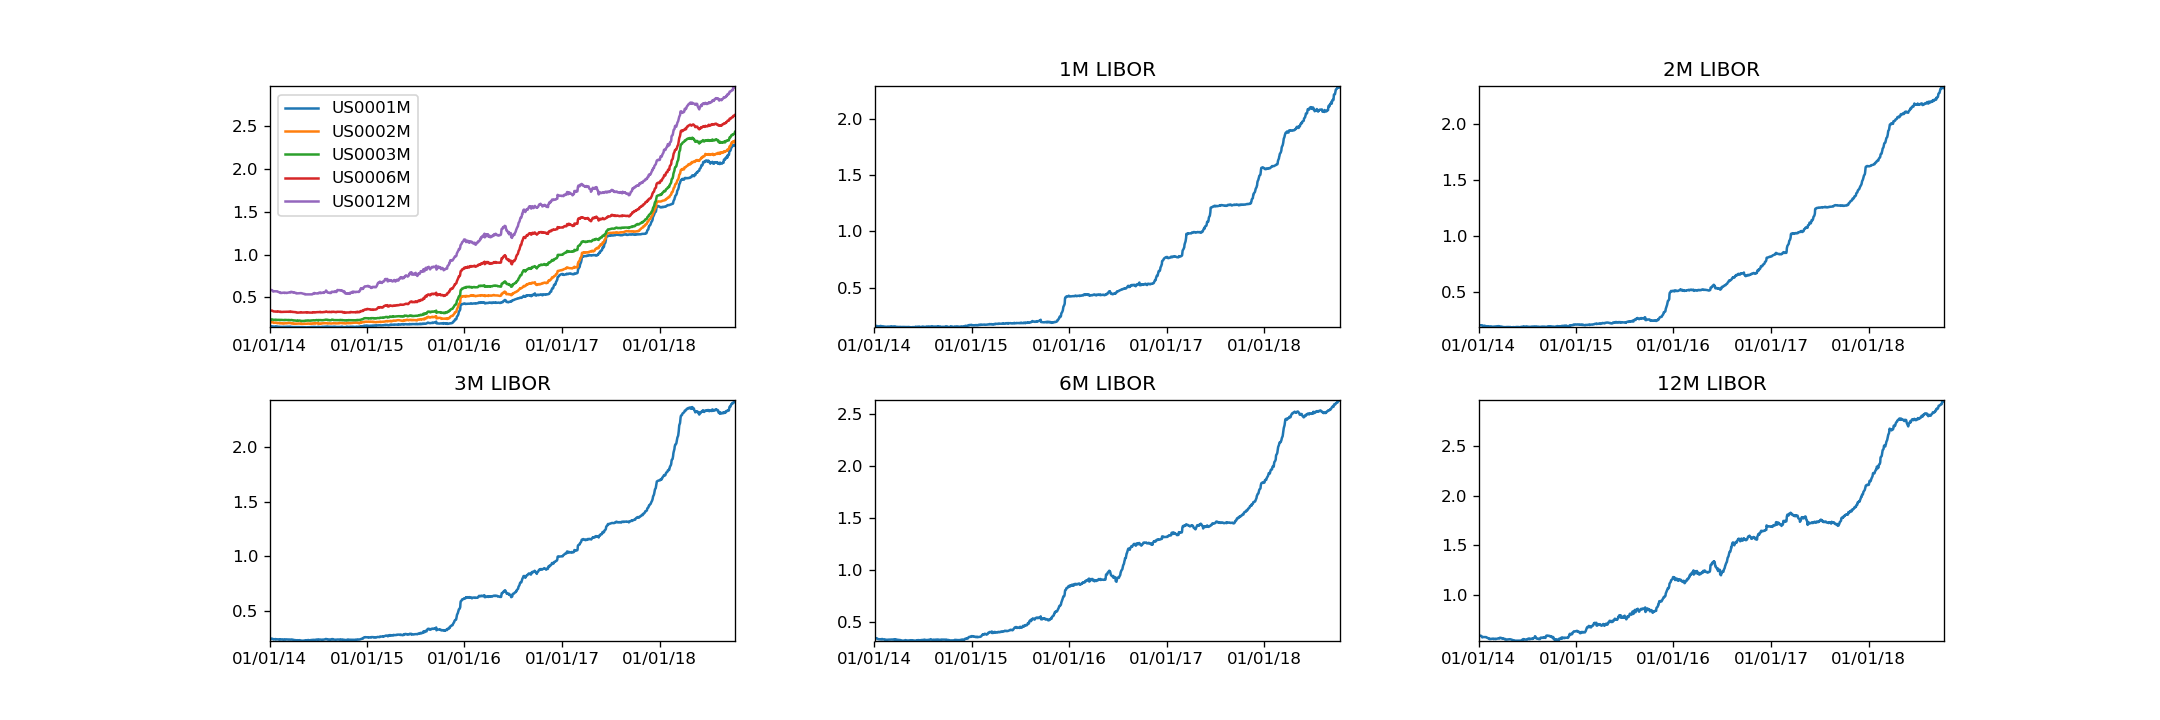

In [4]:
plt.figure(figsize=(18,6)) # set the figure size

for i in range(0,6):
    
    if i == 0:
        #plot data
        plt.subplot(2,3,1)
        plt.plot(df.iloc[:,0], df.iloc[:,1])
        plt.plot(df.iloc[:,0], df.iloc[:,2])
        plt.plot(df.iloc[:,0], df.iloc[:,3])
        plt.plot(df.iloc[:,0], df.iloc[:,4])
        plt.plot(df.iloc[:,0], df.iloc[:,5])
        
        #adjust display setting
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.autoscale(enable=True, axis='y', tight=True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.xticks(rotation='horizontal',horizontalalignment='center')
        
        plt.legend(labels = ['US0001M','US0002M','US0003M','US0006M','US0012M'], loc='best')   
    
    else:
        plt.subplot(2,3,i+1)
        plt.plot(df.iloc[:,0], df.iloc[:,i])  
        
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.autoscale(enable=True, axis='y', tight=True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
        plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
        plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
        plt.xticks(rotation='horizontal',horizontalalignment='center')   
        
        if i == 1:
            liborM = 1
        elif i == 2:
            liborM = 2
        elif i == 3:
            liborM = 3
        elif i == 4:
            liborM = 6
        elif i == 5:
            liborM = 12
            
        plt.title(str(liborM)+'M LIBOR')

wspace = 0.3   # the amount of width reserved for space between subplots,
                     # expressed as a fraction of the average axis width
        
hspace = 0.3   # the amount of height reserved for space between subplots,
                      # expressed as a fraction of the average axis height             

plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.show()

# Q-Q plot (from Jan 2, 2014 to May 24, 2016)

<IPython.core.display.Javascript object>


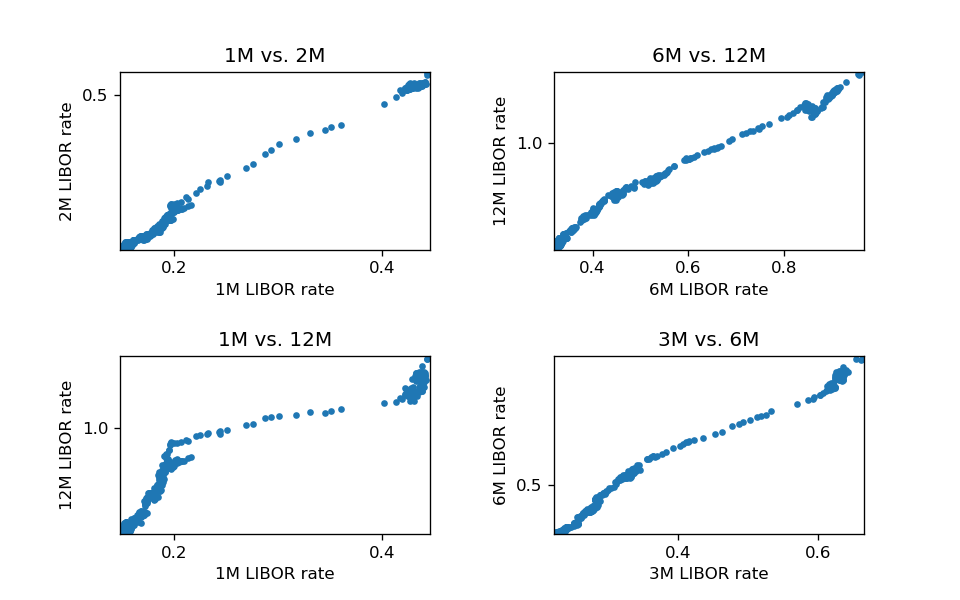

In [5]:
len1 = len(df)

t1 = 0
t2 = int(np.ceil(len1/2))

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,2], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('2M LIBOR rate')
plt.title('1M vs. 2M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,4], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('6M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('6M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('1M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,3], df.iloc[t1:t2,4], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('3M LIBOR rate')
plt.ylabel('6M LIBOR rate')
plt.title('3M vs. 6M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Q-Q plot (from May 25, 2016 to Oct 11, 2018)

<IPython.core.display.Javascript object>


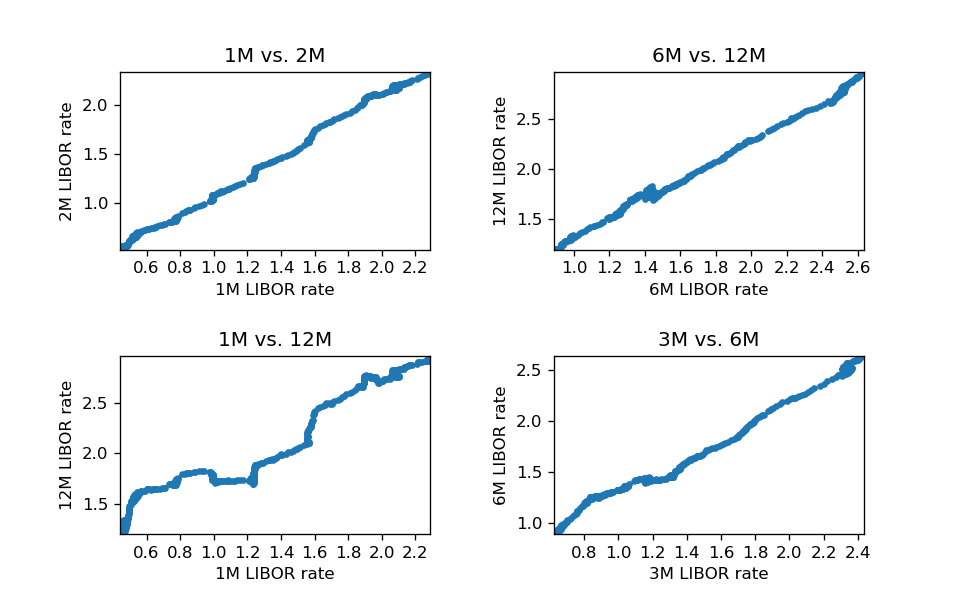

In [6]:
len1 = len(df)

t1 = int(np.ceil(len1/2))
t2 = len1

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,2], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('2M LIBOR rate')
plt.title('1M vs. 2M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,4], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('6M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('6M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('1M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,3], df.iloc[t1:t2,4], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('3M LIBOR rate')
plt.ylabel('6M LIBOR rate')
plt.title('3M vs. 6M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Q-Q plot (from Jan 2, 2014 to Oct 11, 2018)

<IPython.core.display.Javascript object>


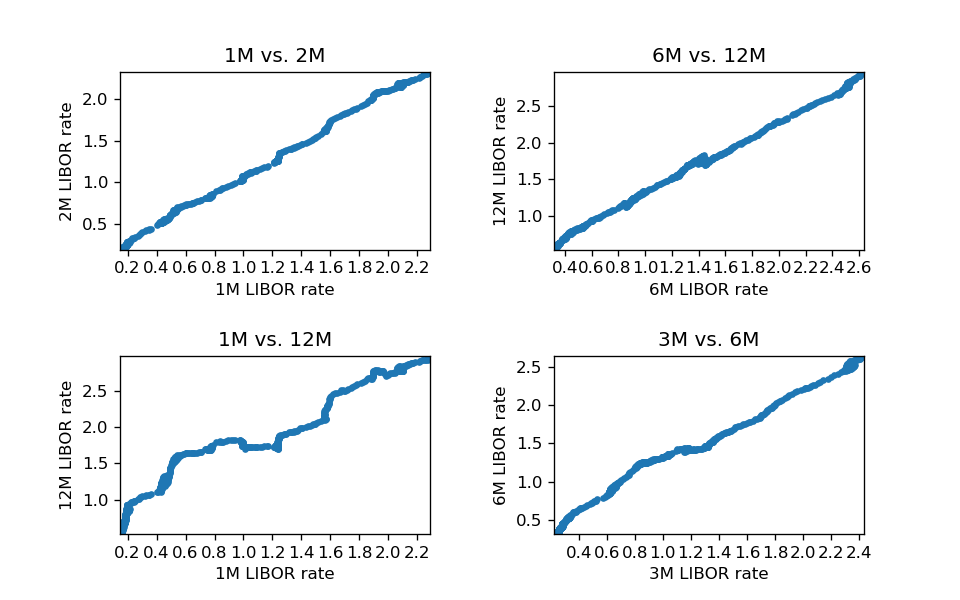

In [7]:
len1 = len(df)

t1 = 0
t2 = len1

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,2], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('2M LIBOR rate')
plt.title('1M vs. 2M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,4], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('6M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('6M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,1], df.iloc[t1:t2,5], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('1M LIBOR rate')
plt.ylabel('12M LIBOR rate')
plt.title('1M vs. 12M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,3], df.iloc[t1:t2,4], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('3M LIBOR rate')
plt.ylabel('6M LIBOR rate')
plt.title('3M vs. 6M')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Swap Curves

<IPython.core.display.Javascript object>


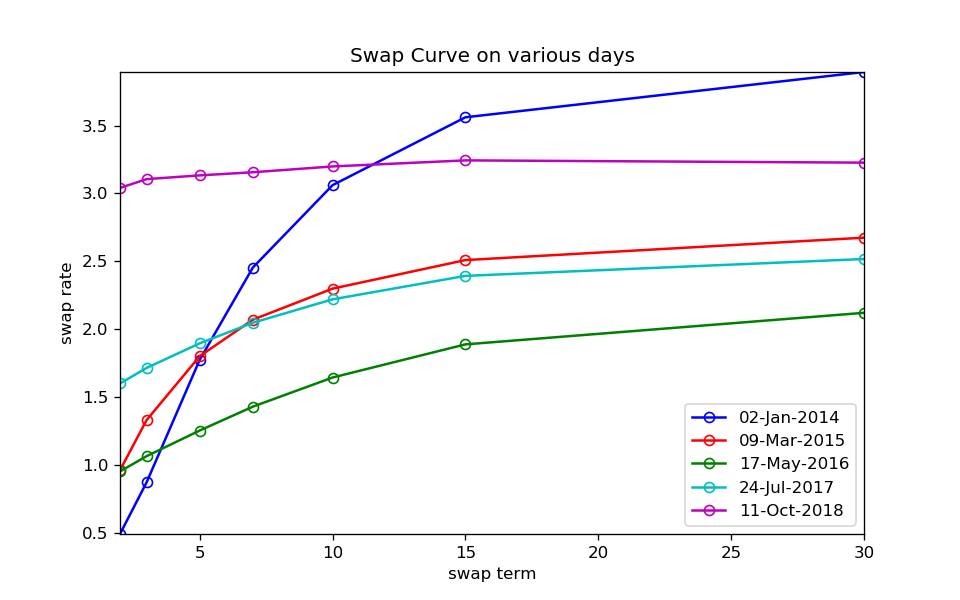

In [8]:
#plot data
plt.figure(figsize=(8,5)) # set the figure size
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[0,6:13], 'bo-', markerfacecolor='None')
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[299,6:13], 'ro-', markerfacecolor='None')
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[599,6:13], 'go-', markerfacecolor='None')
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[899,6:13], 'co-', markerfacecolor='None')
plt.plot([2, 3, 5, 7, 10 ,15, 30], df.iloc[-1,6:13], 'mo-', markerfacecolor='None')

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('swap term')
plt.ylabel('swap rate')
plt.title('Swap Curve on various days')

plt.legend(labels = [df.iloc[0,0].strftime('%d-%b-%Y'), \
                     df.iloc[299,0].strftime('%d-%b-%Y'), \
                     df.iloc[599,0].strftime('%d-%b-%Y'), \
                     df.iloc[899,0].strftime('%d-%b-%Y'), \
                     df.iloc[-1,0].strftime('%d-%b-%Y'), \
                     ], loc='best')

plt.show()

# Market Swap Rates (from Jan 2, 2014 to Oct 11, 2018)

<IPython.core.display.Javascript object>


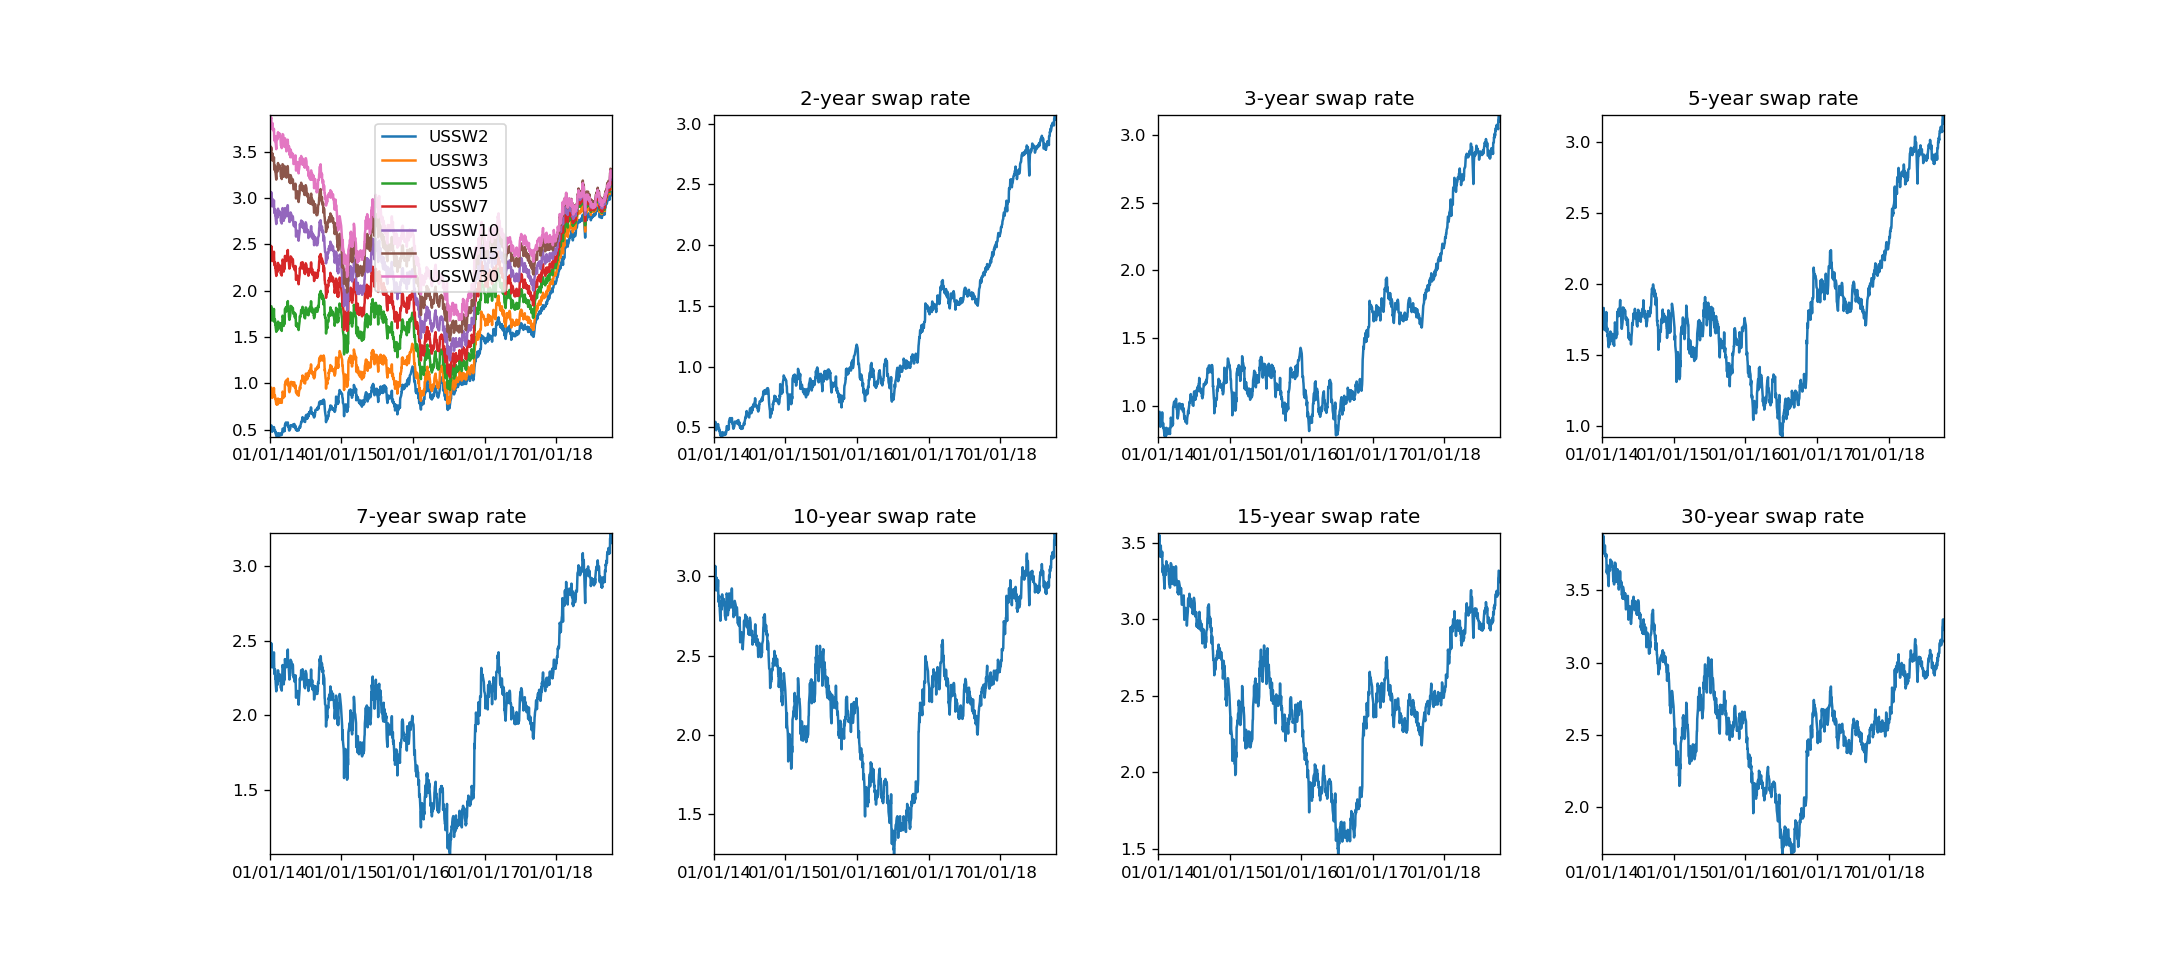

In [9]:
plt.figure(figsize=(18,8)) # set the figure size

for i in range(0,8):
    
    if i == 0:
        #plot data
        plt.subplot(2,4,1)
        plt.plot(df.iloc[:,0], df.iloc[:,6])
        plt.plot(df.iloc[:,0], df.iloc[:,7])
        plt.plot(df.iloc[:,0], df.iloc[:,8])
        plt.plot(df.iloc[:,0], df.iloc[:,9])
        plt.plot(df.iloc[:,0], df.iloc[:,10])
        plt.plot(df.iloc[:,0], df.iloc[:,11])
        plt.plot(df.iloc[:,0], df.iloc[:,12])
        
        #adjust display setting
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.autoscale(enable=True, axis='y', tight=True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.xticks(rotation='horizontal',horizontalalignment='center')
        
        plt.legend(labels = ['USSW2','USSW3','USSW5','USSW7','USSW10','USSW15','USSW30'], loc='best')   
    
    else:
        plt.subplot(2,4,i+1)
        plt.plot(df.iloc[:,0], df.iloc[:,i+5])  
        
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.autoscale(enable=True, axis='y', tight=True)
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
        plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
        plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
        plt.xticks(rotation='horizontal',horizontalalignment='center')   
        
        if i == 1:
            swapYr = 2
        elif i == 2:
            swapYr = 3
        elif i == 3:
            swapYr = 5
        elif i == 4:
            swapYr = 7
        elif i == 5:
            swapYr = 10
        elif i == 6:
            swapYr = 15
        elif i == 7:
            swapYr = 30
            
        plt.title(str(swapYr)+'-year swap rate')

wspace = 0.3   # the amount of width reserved for space between subplots,
                     # expressed as a fraction of the average axis width
        
hspace = 0.3   # the amount of height reserved for space between subplots,
                      # expressed as a fraction of the average axis height             

plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.show()

# Q-Q plot (from Jan 2, 2014 to May 24, 2016)

<IPython.core.display.Javascript object>


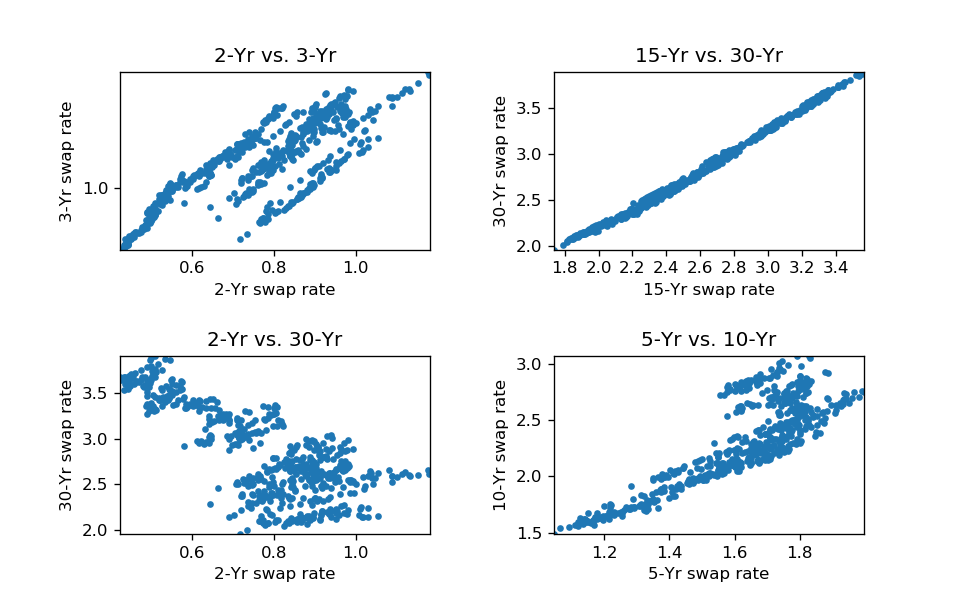

In [10]:
len1 = len(df)

t1 = 1
t2 = int(np.ceil(len1/2))

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,7], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('3-Yr swap rate')
plt.title('2-Yr vs. 3-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,11], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('15-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('15-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('2-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,8], df.iloc[t1:t2,10], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('5-Yr swap rate')
plt.ylabel('10-Yr swap rate')
plt.title('5-Yr vs. 10-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Q-Q plot (from May 25, 2016 to Oct 11, 2018)

<IPython.core.display.Javascript object>


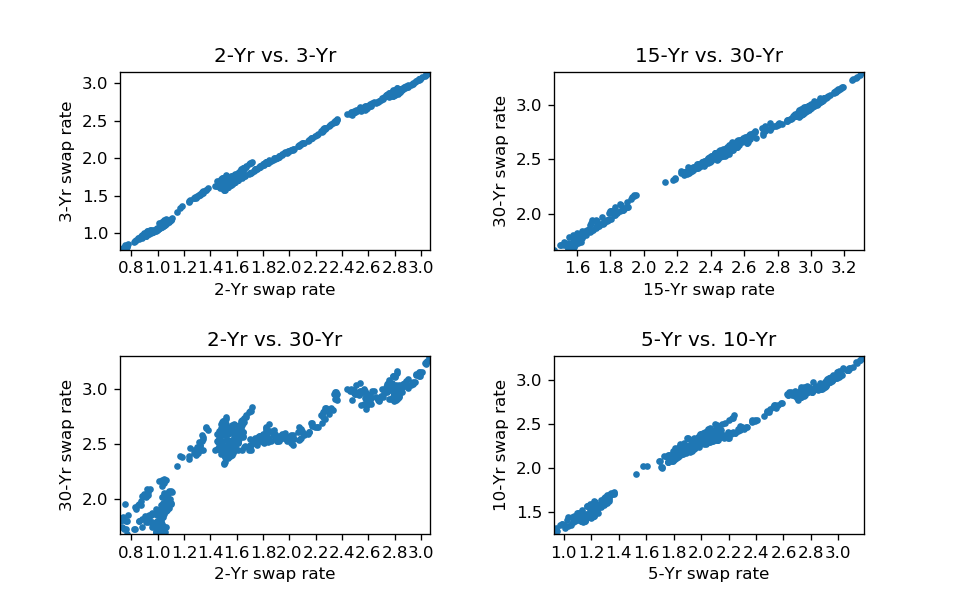

In [11]:
len1 = len(df)

t1 = int(np.ceil(len1/2))
t2 = len1

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,7], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('3-Yr swap rate')
plt.title('2-Yr vs. 3-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,11], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('15-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('15-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('2-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,8], df.iloc[t1:t2,10], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('5-Yr swap rate')
plt.ylabel('10-Yr swap rate')
plt.title('5-Yr vs. 10-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

# Q-Q plot (from Jan 2, 2014 to Oct 11, 2018)

<IPython.core.display.Javascript object>


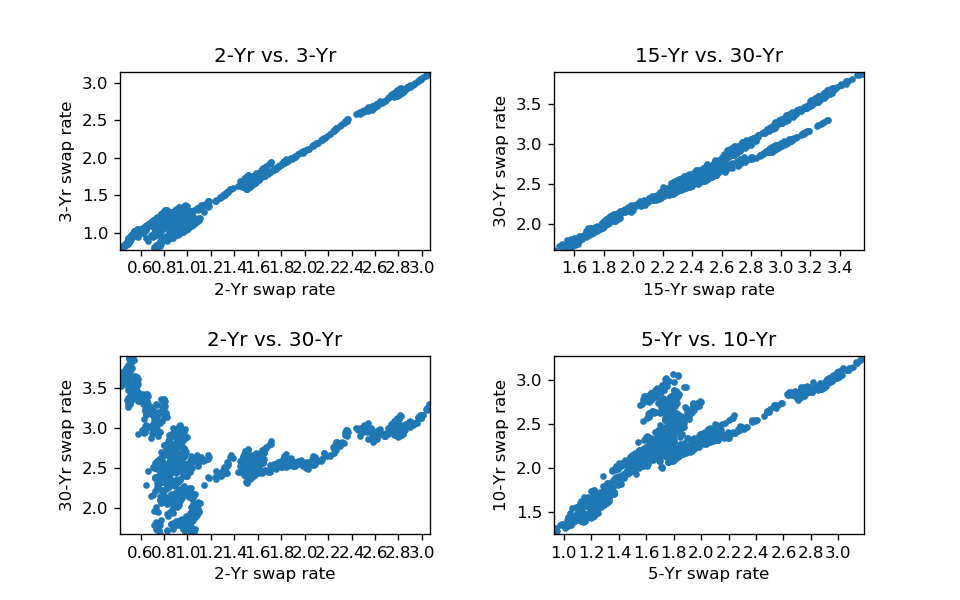

In [12]:
len1 = len(df)

t1 = 1
t2 = len1

plt.figure(figsize=(8,5)) # set the figure size

plt.subplot(2,2,1)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,7], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('3-Yr swap rate')
plt.title('2-Yr vs. 3-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,2)
plt.plot(df.iloc[t1:t2,11], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('15-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('15-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,3)
plt.plot(df.iloc[t1:t2,6], df.iloc[t1:t2,12], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('2-Yr swap rate')
plt.ylabel('30-Yr swap rate')
plt.title('2-Yr vs. 30-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

plt.subplot(2,2,4)
plt.plot(df.iloc[t1:t2,8], df.iloc[t1:t2,10], '.')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('5-Yr swap rate')
plt.ylabel('10-Yr swap rate')
plt.title('5-Yr vs. 10-Yr')

plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))

wspace = 0.4   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.6   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height               
plt.subplots_adjust(wspace=wspace, hspace=hspace)

plt.show()

## regress 5-yr against 2-yr (from Jan 2, 2014 to May 24, 2016)

[ 1.8079227] [[-0.2480387]]
0.0431801396563


<IPython.core.display.Javascript object>


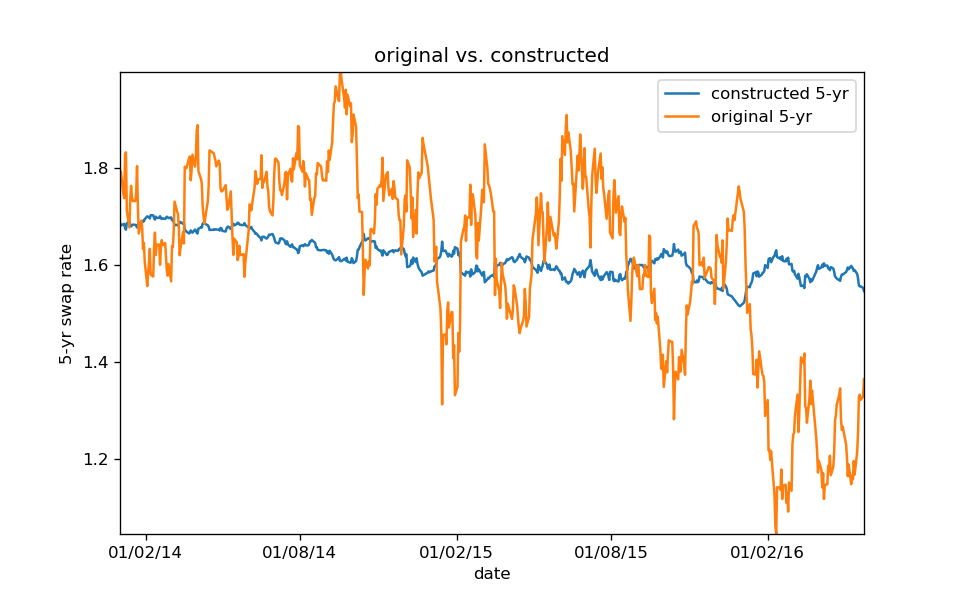

In [15]:
len1 = len(df)

t1 = 0
t2 = int(np.ceil(len1/2))

xX = df.iloc[t1:t2,6:7]
yY = df.iloc[t1:t2,8:9]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,6:7] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,8:9])

#adjust display setting
#plt.figure(figsize=(8,5)) # set the figure size
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('5-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 5-yr','original 5-yr'], loc='best')

plt.show()

## regress 5-yr against 2-yr (from May 25, 2016 to Oct 11, 2018)

[ 0.43706762] [[ 0.90311227]]
0.96822828184


<IPython.core.display.Javascript object>


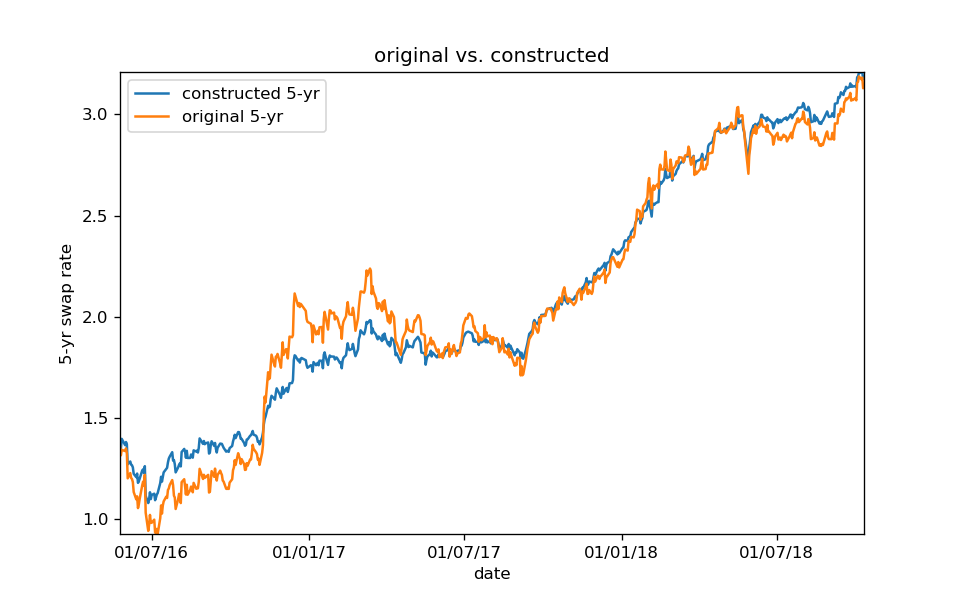

In [16]:
len1 = len(df)

t1 = int(np.ceil(len1/2))
t2 = len1

xX = df.iloc[t1:t2,6:7]
yY = df.iloc[t1:t2,8:9]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,6:7] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,8:9])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('5-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 5-yr','original 5-yr'], loc='best')

plt.show()

## regress 5-yr against 2-yr (from Jan 2, 2014 to Oct 11, 2018)

[ 1.03876557] [[ 0.62619905]]
0.768824964502


<IPython.core.display.Javascript object>


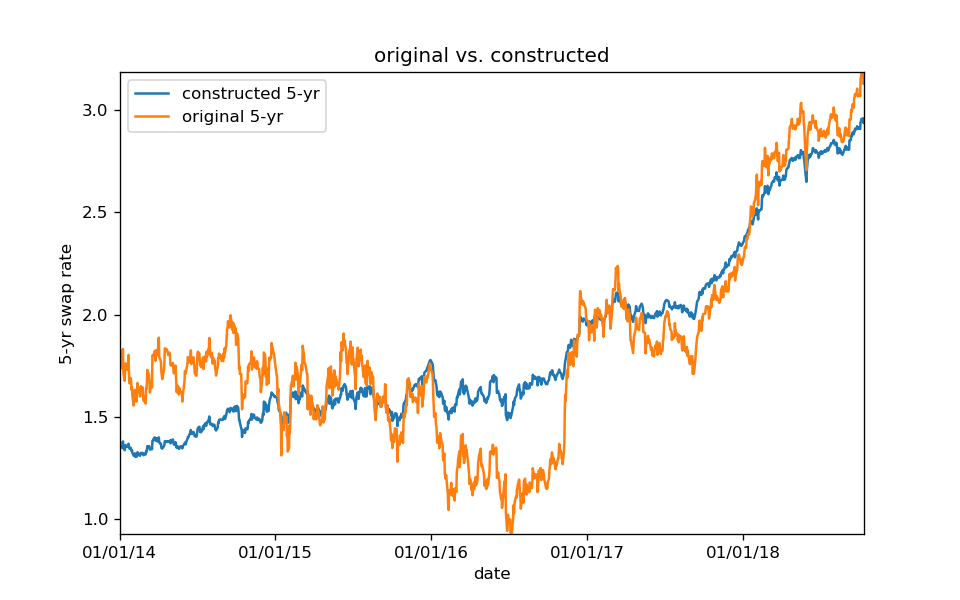

In [17]:
len1 = len(df)

t1 = 0
t2 = len1

xX = df.iloc[t1:t2,6:7]
yY = df.iloc[t1:t2,8:9]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,6:7] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,8:9])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('5-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 5-yr','original 5-yr'], loc='best')

plt.show()

## regress 30-yr against 15-yr (from Jan 2, 2014 to May 24, 2016)

[ 0.02430841] [[ 1.08162197]]
0.994786634158


<IPython.core.display.Javascript object>


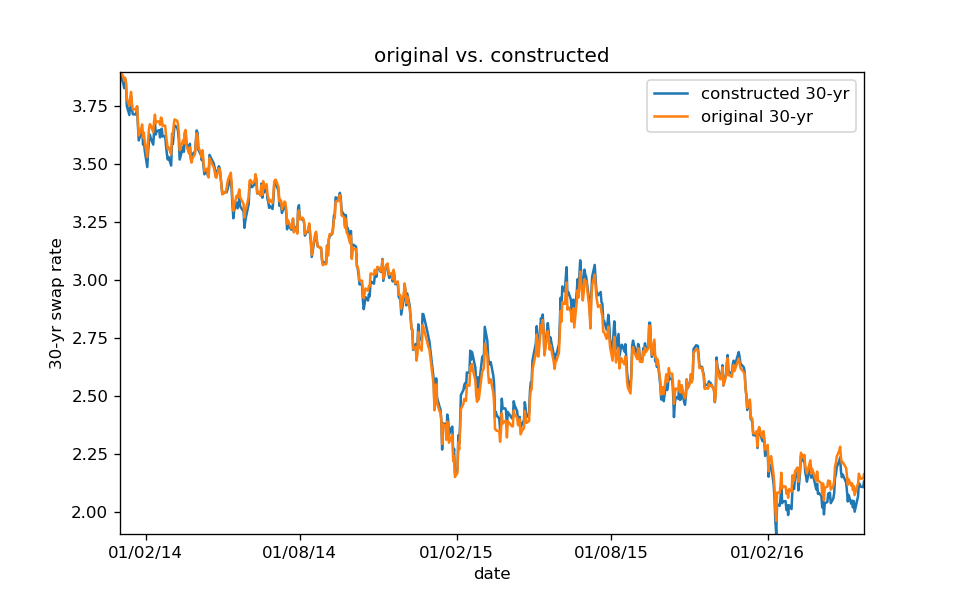

In [18]:
len1 = len(df)

t1 = 0`
t2 = int(np.ceil(len1/2))

xX = df.iloc[t1:t2,11:12]
yY = df.iloc[t1:t2,12:13]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,11:12] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,12:13])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('30-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 30-yr','original 30-yr'], loc='best')

plt.show()

## regress 30-yr against 15-yr (from May 25, 2016 to Oct 11, 2018)

[ 0.44771641] [[ 0.85177058]]
0.995169312527


<IPython.core.display.Javascript object>


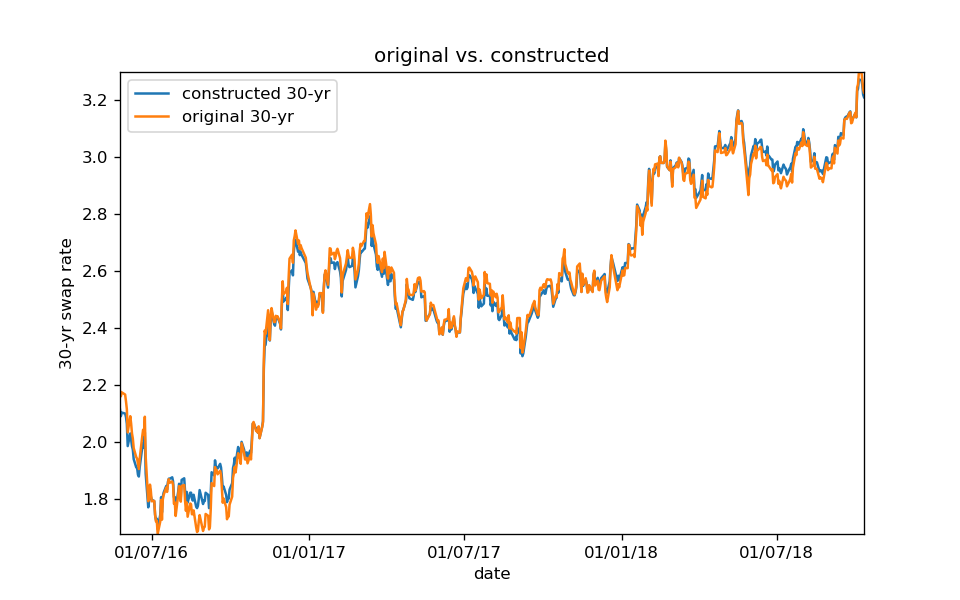

In [19]:
len1 = len(df)

t1 = int(np.ceil(len1/2))
t2 = len1

xX = df.iloc[t1:t2,11:12]
yY = df.iloc[t1:t2,12:13]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,11:12] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,12:13])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('30-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 30-yr','original 30-yr'], loc='best')

plt.show()

## regress 30-yr against 15-yr (from Jan 2, 2014 to Oct 11, 2018)

[ 0.35040478] [[ 0.01235598 -0.76618625  1.61493626]]
0.993819498302


<IPython.core.display.Javascript object>


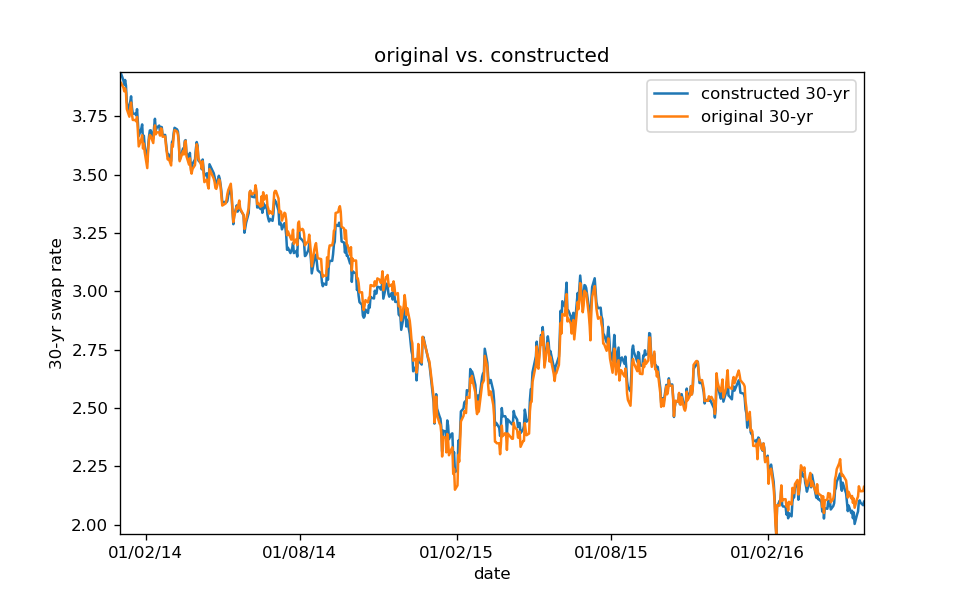

In [20]:


len1 = len(df)

t1 = 0
t2 = int(np.ceil(len1/2))

xX = df.iloc[t1:t2,[6,8,10]]
yY = df.iloc[t1:t2,12:13]
regr = linear_model.LinearRegression()
regr.fit(xX, yY)
B = regr.coef_
b_0 = regr.intercept_
rSquared = regr.score(xX, yY)

print(b_0, B)
print(rSquared)

yHat = b_0 + df.iloc[t1:t2,[6,8,10]] @ B.T

#plot data
plt.figure(figsize=(8,5)) # set the figure size

plt.plot(df.iloc[t1:t2,0], yHat)
plt.plot(df.iloc[t1:t2,0], df.iloc[t1:t2,12:13])

#adjust display setting
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='horizontal',horizontalalignment='center')

plt.xlabel('date')
plt.ylabel('30-yr swap rate')
plt.title('original vs. constructed')
plt.legend(labels = ['constructed 30-yr','original 30-yr'], loc='best')

plt.show()


## Gradient Descent

In [22]:
#Simulate data

#lenT = int(np.ceil(len(df)/2))
lenT = len(df)

yY = df.iloc[:lenT,8]
xX = df.iloc[:lenT,6]

a = np.arange(-200, 200+5, 5.0)
len1 = len(a)
b = np.arange(-200, 200+5, 5.0)
len2 = len(b)
s = np.zeros((len2,len1))

a, b = np.meshgrid(a, b)

for i in range(len1):
    for j in range(len2):
        s[j,i] = np.sum((yY-a[j,i]-b[j,i]*xX)**2)/(2*lenT)

## Visualization

<IPython.core.display.Javascript object>


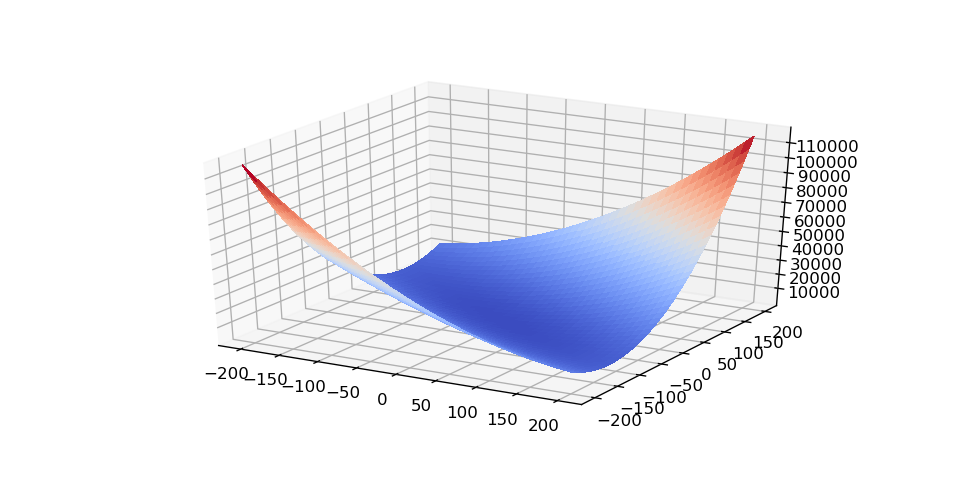

In [23]:
##surface
fig = plt.figure(figsize=(8,4))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(a, b, s, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10000))

plt.show()

<IPython.core.display.Javascript object>


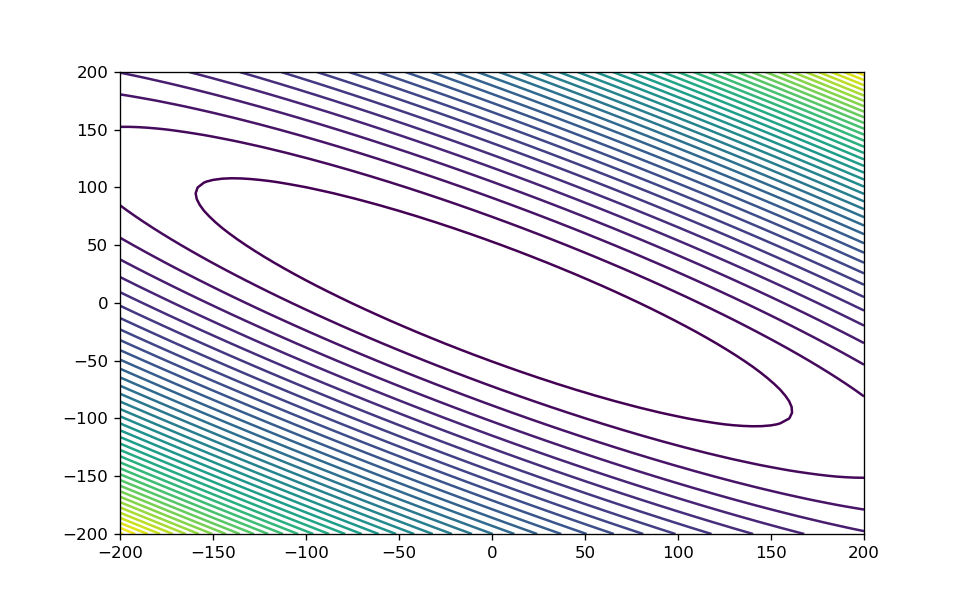

In [24]:
##contour

plt.figure(figsize=(8,5)) # set the figure size
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))

plt.show()

In [25]:
#import objective function and gradient
from gradient import *
from objFunc1 import *

γ=0.005,n=300

<IPython.core.display.Javascript object>


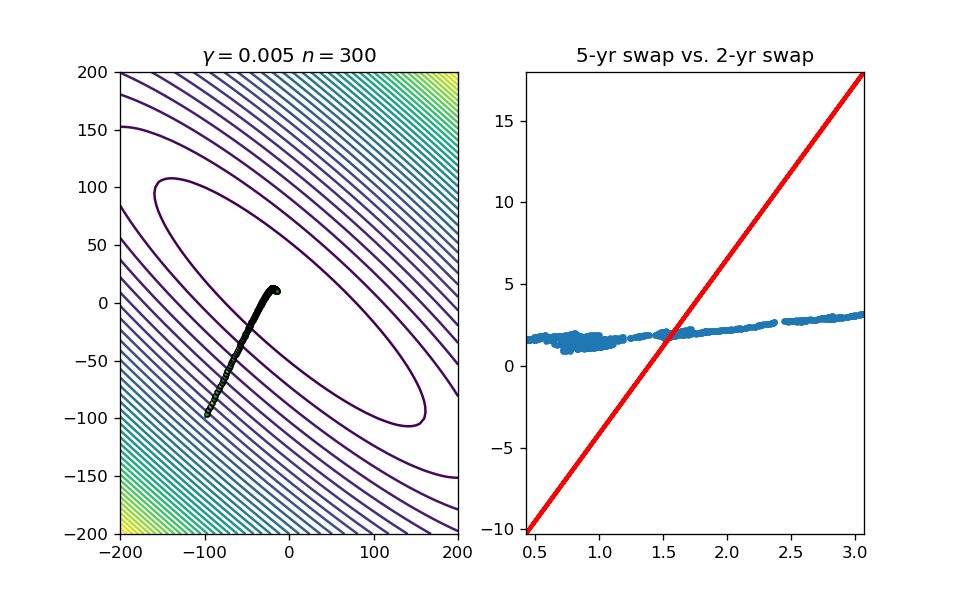

-------------------------
300 of iterations:
optimal results:
[-14.823150531231191, 10.68748297630813]


In [26]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.005

plotNum = 1

ePre = 0
maxCounts = 300
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e


plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()

γ=0.1,n=264


<IPython.core.display.Javascript object>


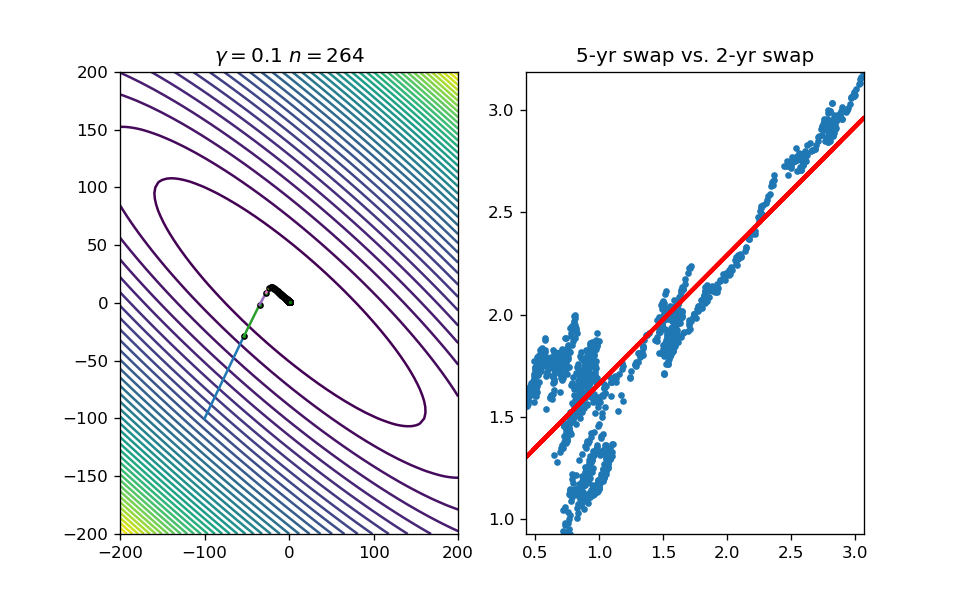

-------------------------
264 of iterations:
optimal results:
[1.0359797451543376, 0.62796863106499512]


In [27]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.1

plotNum = 1

ePre = 0
maxCounts = 300
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e


plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()

γ=0.2,n=140

<IPython.core.display.Javascript object>


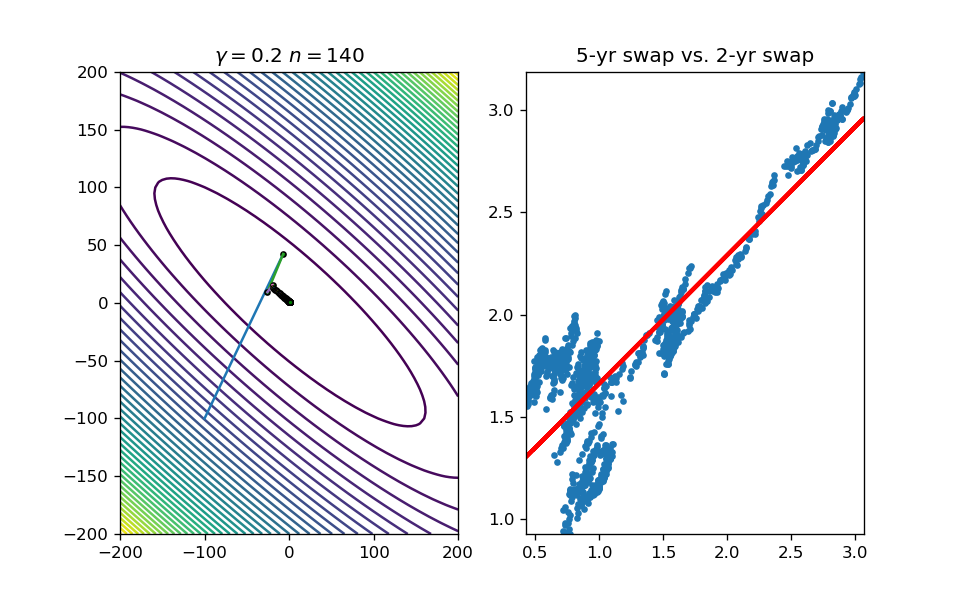

-------------------------
140 of iterations:
optimal results:
[1.0374653043745212, 0.62702498711741905]


In [28]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.2

plotNum = 1

ePre = 0
maxCounts = 300
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e

plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()

γ=0.3,n=95

<IPython.core.display.Javascript object>


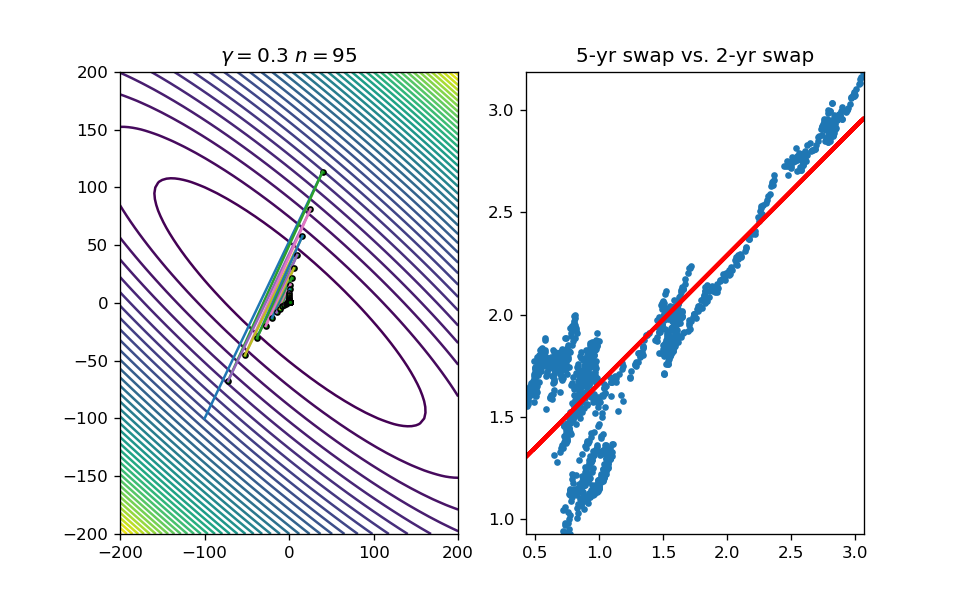

-------------------------
95 of iterations:
optimal results:
[1.0378901610179903, 0.62675042252534841]


In [29]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.3

plotNum = 1

ePre = 0
maxCounts = 300
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e


plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()

γ=0.33,n=50

<IPython.core.display.Javascript object>


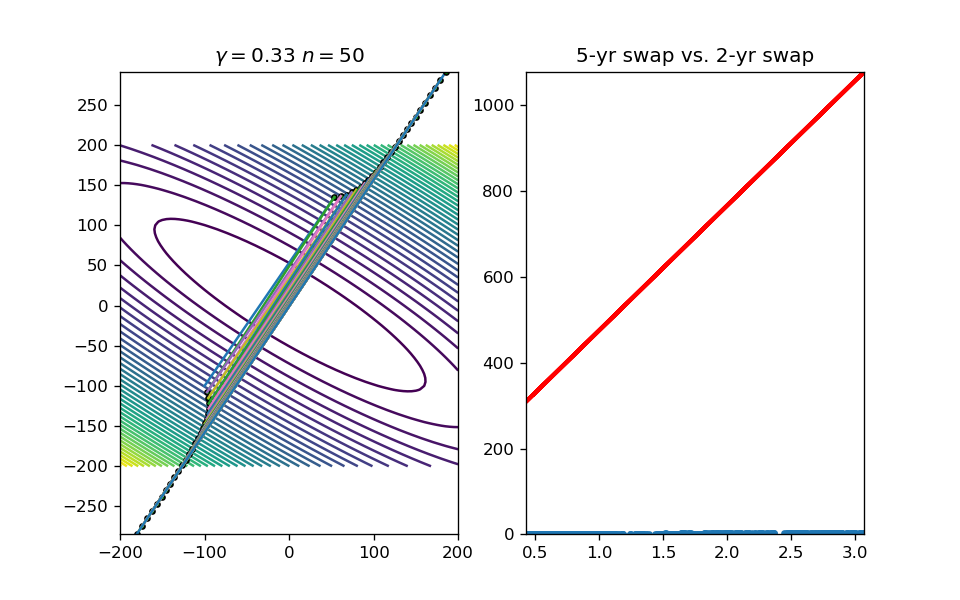

-------------------------
50 of iterations:
optimal results:
[185.2505380566532, 290.76290926401145]


In [30]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.33

plotNum = 1

ePre = 0
maxCounts = 50
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e


plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()

In [31]:
def zero_coupon(tau, r0, kappa, theta, sigma, model):
    #tau = tau(:);
    if model == 'Vasicek':
        B = (1 - np.exp(-kappa * tau)) / kappa
        A = (theta - sigma**2 / (2 * kappa**2)) * (B - tau) - (sigma**2 / (4 * kappa)) * B**2
    elif model == 'CIR':
        g = np.sqrt(kappa**2 + 2 * sigma**2)  
        tmp = 2 * kappa * theta / sigma**2
        tmp1 = kappa * tau / 2
        tmp2 = g * tau / 2
        
        A = tmp * np.log(np.exp(tmp1) / (np.cosh(tmp2) + (kappa / g) * np.sinh(tmp2)))
        #B = 2. / (kappa + g * (1. / np.tanh(g * tau / 2)))
        tanh = np.tanh(g * tau / 2)
        B = 2. * tanh / (kappa * tanh + g)
    else:
        print('zero_coupon: model must be "Vasicek" or "CIR"!')
        return -1

    #n1 = len(r0)
    n2 = len(A)
    #A_ = repmat(A,1,n1)
    A_ = A
    #B_ = repmat(B,1,n1)
    B_ = B

    #r_ = repmat(r0,n2,1)
    r_ = np.repeat(r0, n2)

    p = np.exp(A_ - B_ * r_)
    return p

def swapRates(tau, p, mat):
    
    tmax = mat[-1]
    
    ttemp = np.arange(0.5, tmax + 0.5, 0.5)
    ptemp = np.interp(ttemp, tau, p)
    
    dis = np.cumsum(ptemp)
    #dis = dis(:);

    # linear interpolation
    pmat = np.interp(mat, tau, p)

    index = (2 * mat).astype(int) - 1
    S = 100 * 2 * (1 - pmat) / dis[index]
    
    return S

def liborRates(tau, p, mat):
    pmat = np.interp(mat, tau, p)
    L = 100 * (1. / pmat - 1) / mat
    return L

def objFunc1(params, tau, LIBOR, SWAP, model):
    # unpack params
    r0 = params[0]
    kappa = params[1]
    theta = params[2]
    sigma = params[3]

    p = zero_coupon(tau, r0, kappa, theta, sigma, model)
    # now that we have zero-coupon bond prices p(t,T)
    # now it is time to calculate MODEL LIBOR rates and SWAP rates
    S = swapRates(tau, p, SWAP[:,0])
    L = liborRates(tau, p, LIBOR[:,0])

    # the goal is to minimize the distance between model rates and market rates
    rel1 = (S - SWAP[:,1]) / SWAP[:,1]
    rel2 = (L - LIBOR[:,1]) / LIBOR[:,1]

    #rel1 = (S-SWAP(:,2))
    #rel2 = (L-LIBOR(:,2))

    #mae = (sum(abs(rel1))+sum(abs(rel2)))
    mae = np.sum(rel1**2) + np.sum(rel2**2)
    
    return mae

def calibration(fun, param_0, tau, LIBOR, SWAP, model):
     # change tolerance
    opt = {'maxiter':1000, 'maxfev':5e3}
    sol = minimize(objFunc1, params1, args = (tau, LIBOR, SWAP, model), method='Nelder-Mead', options=opt)
    print(sol.message)
    par = np.array(sol.x)
    print('parameters = ' + str(par))
    r_star = par[0]
    kappa_star = par[1]
    theta_star = par[2]
    sigma_star = par[3]
    p = zero_coupon(tau, r_star, kappa_star, theta_star, sigma_star, model)
    L = liborRates(tau, p, LIBOR[:, 0])
    S = swapRates(tau, p, SWAP[:, 0])
    return p, L, S

In [32]:
LIBOR = np.array([[1/12, 1.49078, 2.2795],
    [2/12, 1.52997, 2.33075],
    [3/12, 1.60042, 2.43631],
    [6/12, 1.76769, 2.63525],
    [12/12, 2.04263, 2.95425]])

SWAP = np.array([[2, 2.013, 3.0408],
    [3, 2.1025, 3.1054],
    [5, 2.195, 3.1332],
    [7, 2.2585, 3.1562],
    [10, 2.3457, 3.199],
    [15, 2.4447, 3.2437],
    [30, 2.5055, 3.227]])


In [33]:
# we are going out 30 years every month (1/12)
tau = np.arange(0, 30 + 1/12, 1/12)

# initial starting point
# r0 = 0.02 kappa0 = 2 theta0 = 0.5 sigma0 = 0.1
params = np.array([0.02, 1.0, 0.05, 0.3]);

params1 = np.array([0.25, 5, 0.2, 0.1]);
params2 = np.array([0.25, 5, 0.2, 0.1]);

In [34]:
model = 'Vasicek'

In [37]:
# first date
whichOne = 1
p11, L11, S11 = calibration(objFunc1, params1, tau, LIBOR[:,[0,whichOne]], SWAP[:,[0,whichOne]], model) 

Optimization terminated successfully.
parameters = [ 0.01445667  0.9474955   0.02918339  0.0952191 ]


In [38]:
# second date
whichOne = 2
p12, L12, S12 = calibration(objFunc1, params1, tau, LIBOR[:,[0,whichOne]], SWAP[:,[0,whichOne]], model) 

Optimization terminated successfully.
parameters = [  2.13256819e-02   2.82039824e+00   3.21754393e-02   1.27705822e-05]


In [39]:
model = 'CIR'

In [40]:
# first date
whichOne = 1
p21, L21, S21 = calibration(objFunc1, params1, tau, LIBOR[:,[0,whichOne]], SWAP[:,[0,whichOne]], model) 

Optimization terminated successfully.
parameters = [ 0.01450723  1.33983861  0.02434852  0.21673566]


In [41]:
# second date
whichOne = 2
p22, L22, S22 = calibration(objFunc1, params1, tau, LIBOR[:,[0,whichOne]], SWAP[:,[0,whichOne]], model) 

Optimization terminated successfully.
parameters = [ 0.02132201  2.78197716  0.03235121  0.29123648]


## Plots

Vasicek

<IPython.core.display.Javascript object>


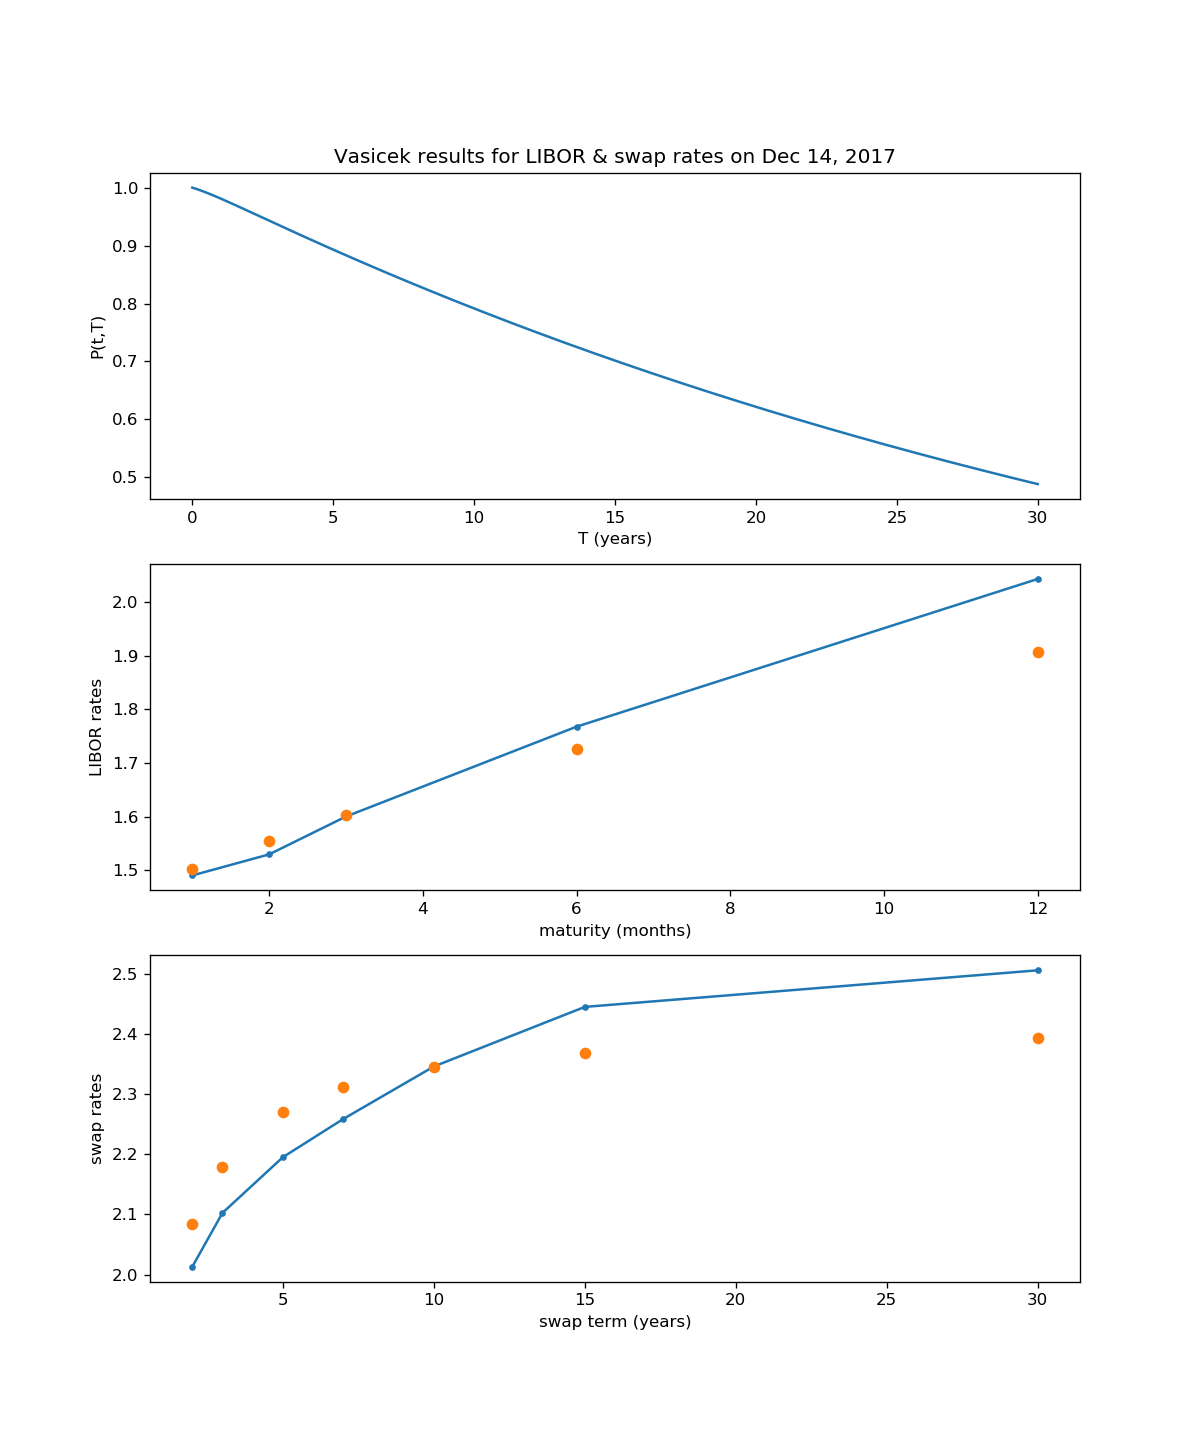

In [42]:
# vasicek first date
whichOne = 1
dataDate = 'Dec 14, 2017';
    
plt.figure(figsize=(10,12))

plt.subplot(3,1,1)
plt.plot(tau, p11)
plt.xlabel('T (years)')
plt.ylabel('P(t,T)')
plt.title('Vasicek results for LIBOR & swap rates on ' + dataDate)

plt.subplot(3,1,2)
plt.plot(12 * LIBOR[:,0], LIBOR[:,whichOne], '.-')
plt.plot(12 * LIBOR[:,0], L11, 'o')
plt.xlabel('maturity (months)')
plt.ylabel('LIBOR rates')

plt.subplot(3,1,3)
plt.plot(SWAP[:,0], SWAP[:,whichOne], '.-')
plt.plot(SWAP[:,0], S11, 'o')
plt.xlabel('swap term (years)')
plt.ylabel('swap rates')

plt.show()

<IPython.core.display.Javascript object>


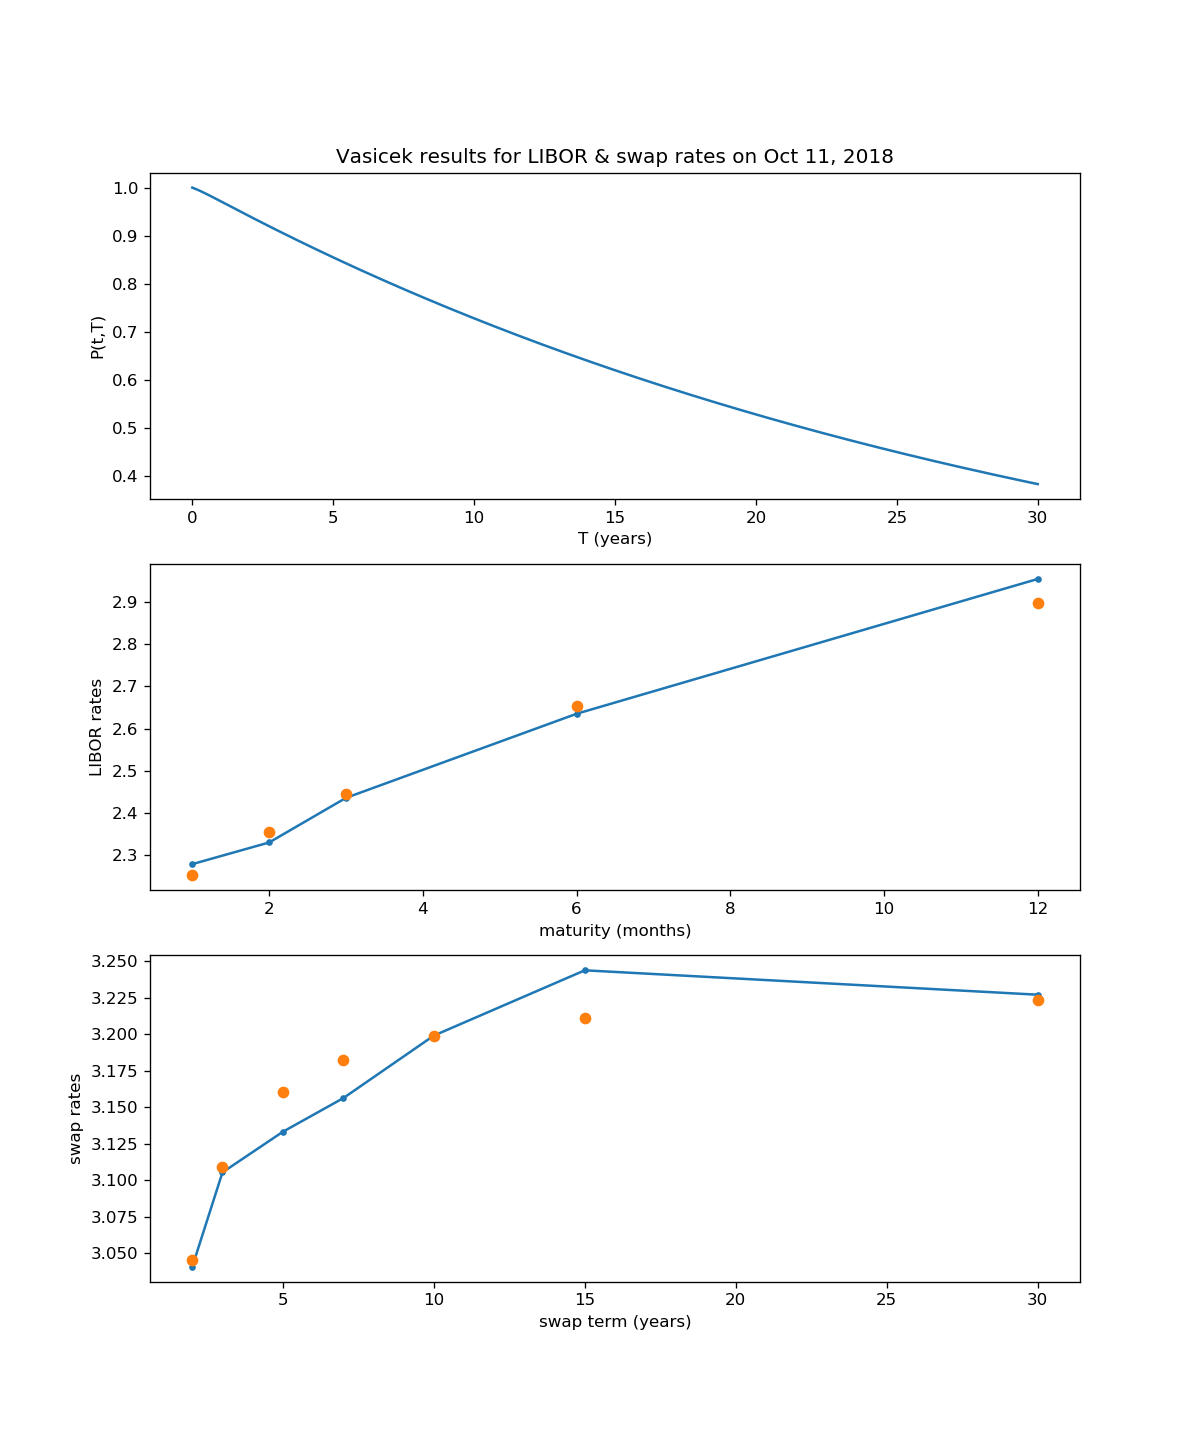

In [43]:
# vasicek second date
whichOne = 2
dataDate = 'Oct 11, 2018';
    
plt.figure(figsize=(10,12))

plt.subplot(3,1,1)
plt.plot(tau, p12)
plt.xlabel('T (years)')
plt.ylabel('P(t,T)')
plt.title('Vasicek results for LIBOR & swap rates on ' + dataDate)

plt.subplot(3,1,2)
plt.plot(12 * LIBOR[:,0], LIBOR[:,whichOne], '.-')
plt.plot(12 * LIBOR[:,0], L12, 'o')
plt.xlabel('maturity (months)')
plt.ylabel('LIBOR rates')

plt.subplot(3,1,3)
plt.plot(SWAP[:,0], SWAP[:,whichOne], '.-')
plt.plot(SWAP[:,0], S12, 'o')
plt.xlabel('swap term (years)')
plt.ylabel('swap rates')

plt.show()

<IPython.core.display.Javascript object>


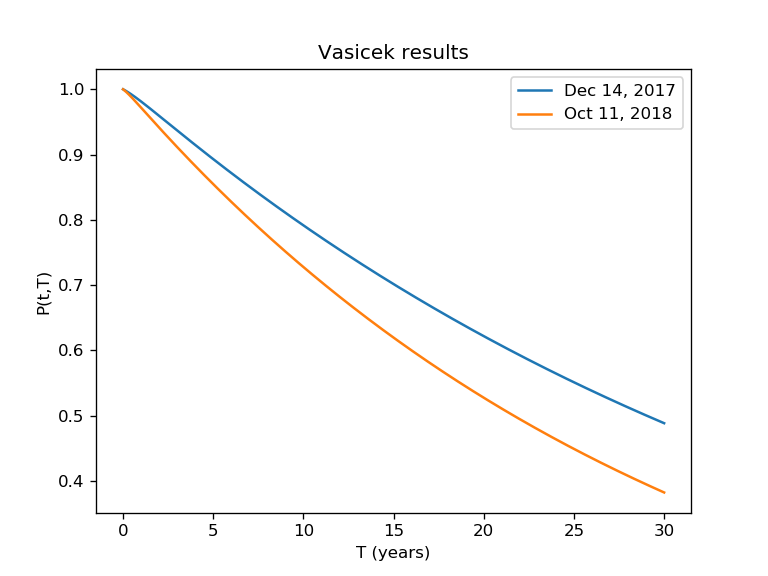

In [44]:
# vasicek comparison
plt.figure()
plt.plot(tau, p11)
plt.plot(tau, p12)
plt.xlabel('T (years)')
plt.ylabel('P(t,T)')
plt.legend(['Dec 14, 2017', 'Oct 11, 2018'])
plt.title('Vasicek results')
plt.show()

<IPython.core.display.Javascript object>


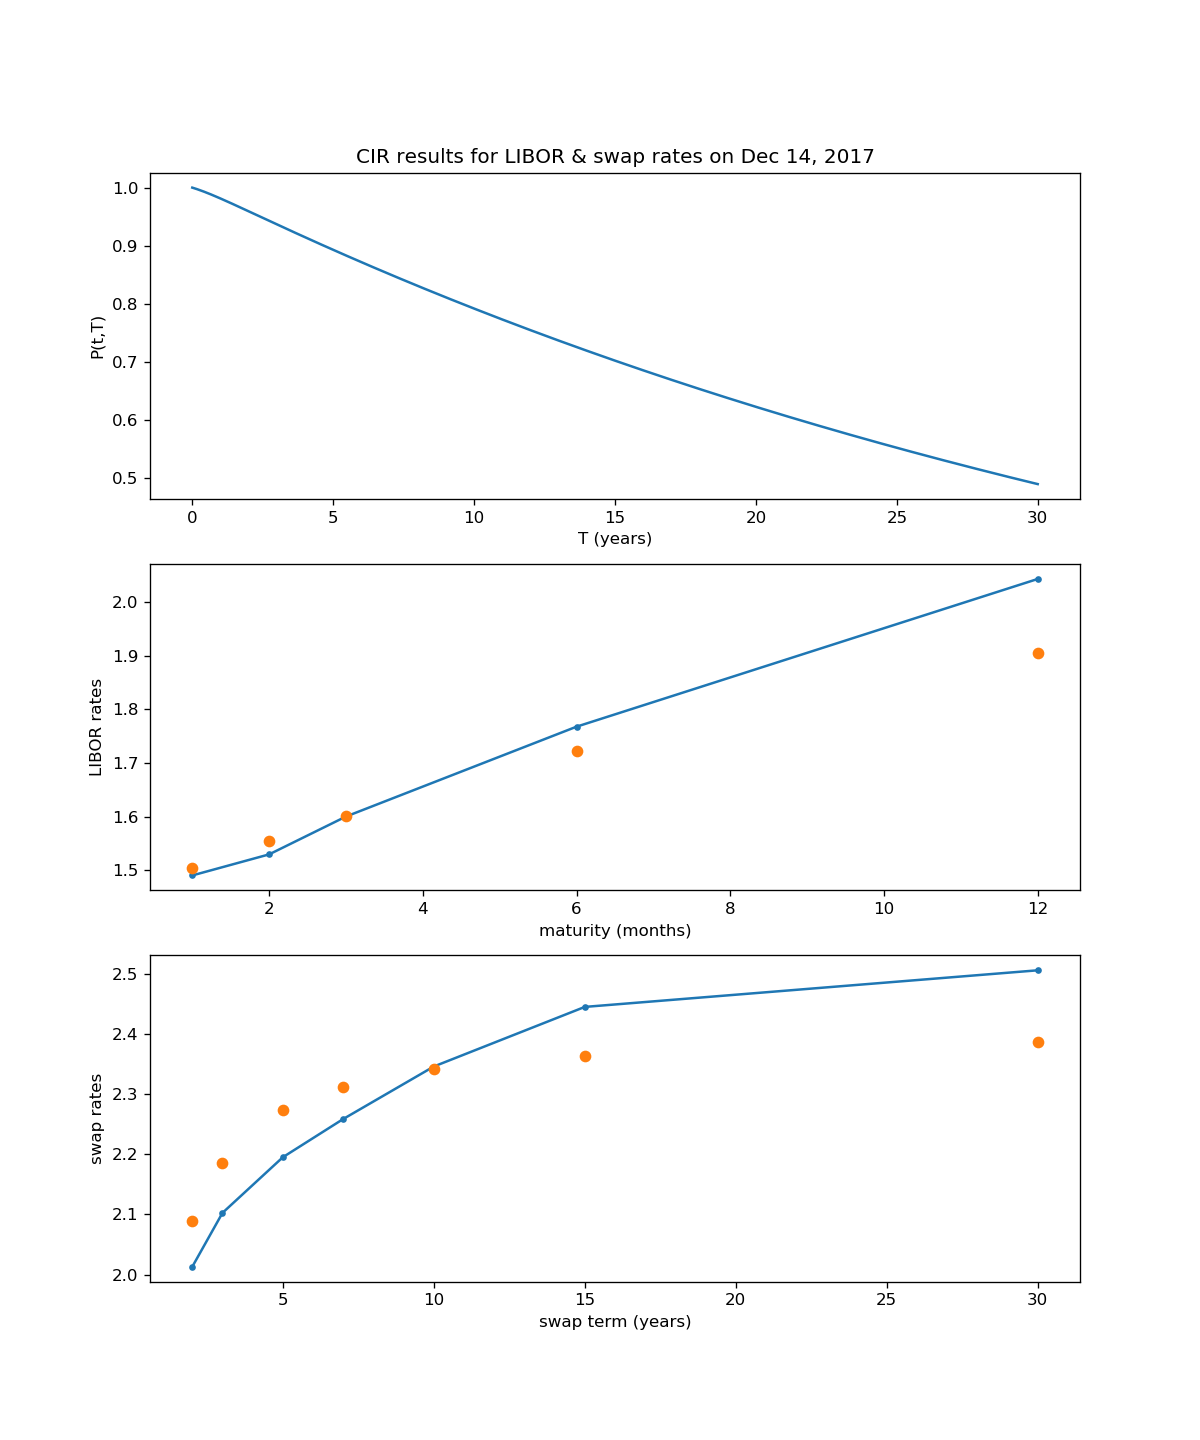

In [45]:
# cir first date
whichOne = 1
dataDate = 'Dec 14, 2017';
    
plt.figure(figsize=(10,12))

plt.subplot(3,1,1)
plt.plot(tau, p21)
plt.xlabel('T (years)')
plt.ylabel('P(t,T)')
plt.title('CIR results for LIBOR & swap rates on ' + dataDate)

plt.subplot(3,1,2)
plt.plot(12 * LIBOR[:,0], LIBOR[:,whichOne], '.-')
plt.plot(12 * LIBOR[:,0], L21, 'o')
plt.xlabel('maturity (months)')
plt.ylabel('LIBOR rates')

plt.subplot(3,1,3)
plt.plot(SWAP[:,0], SWAP[:,whichOne], '.-')
plt.plot(SWAP[:,0], S21, 'o')
plt.xlabel('swap term (years)')
plt.ylabel('swap rates')

plt.show()

<IPython.core.display.Javascript object>


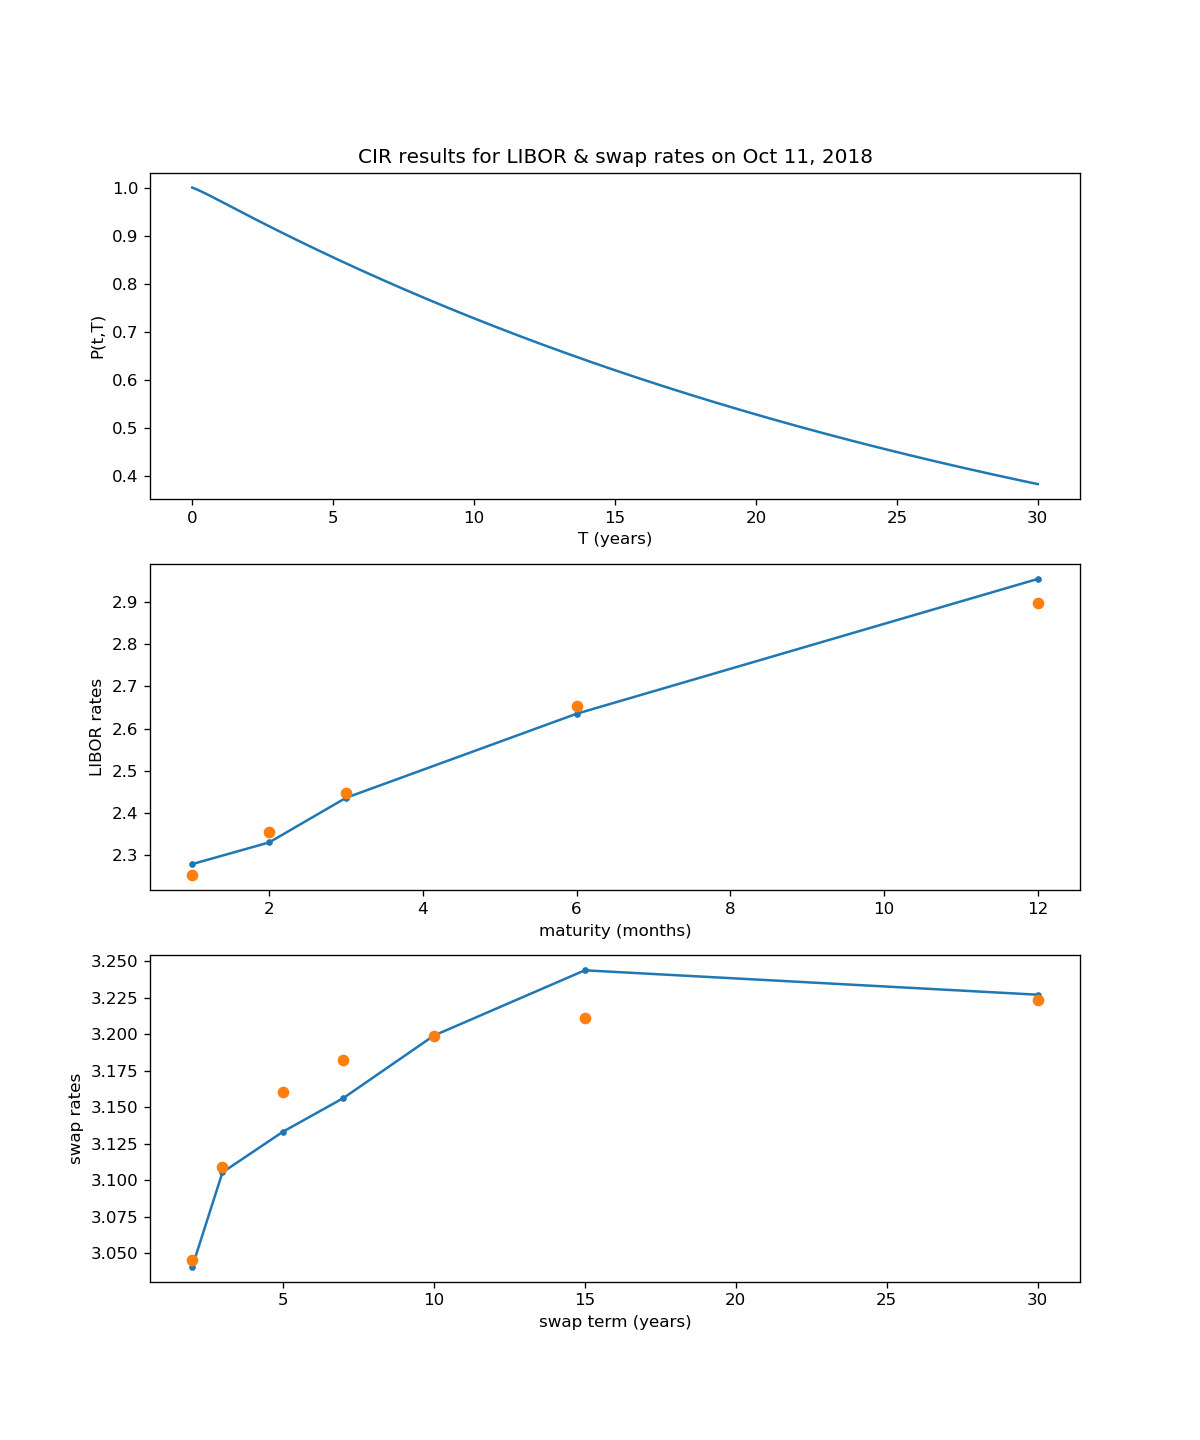

In [46]:
# cir second date
whichOne = 2
dataDate = 'Oct 11, 2018';
    
plt.figure(figsize=(10,12))

plt.subplot(3,1,1)
plt.plot(tau, p22)
plt.xlabel('T (years)')
plt.ylabel('P(t,T)')
plt.title('CIR results for LIBOR & swap rates on ' + dataDate)

plt.subplot(3,1,2)
plt.plot(12 * LIBOR[:,0], LIBOR[:,whichOne], '.-')
plt.plot(12 * LIBOR[:,0], L22, 'o')
plt.xlabel('maturity (months)')
plt.ylabel('LIBOR rates')

plt.subplot(3,1,3)
plt.plot(SWAP[:,0], SWAP[:,whichOne], '.-')
plt.plot(SWAP[:,0], S22, 'o')
plt.xlabel('swap term (years)')
plt.ylabel('swap rates')

plt.show()

<IPython.core.display.Javascript object>


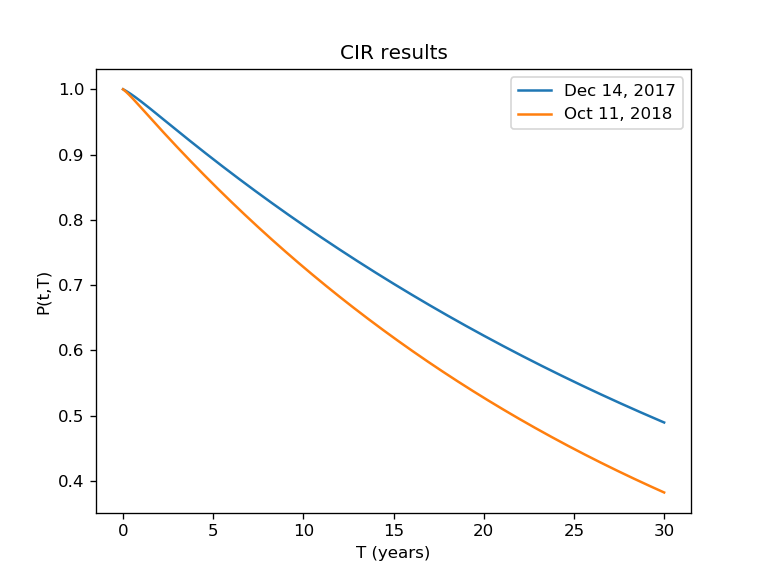

In [47]:
# cir comparison
plt.figure()
plt.plot(tau, p21)
plt.plot(tau, p22)
plt.xlabel('T (years)')
plt.ylabel('P(t,T)')
plt.legend(['Dec 14, 2017', 'Oct 11, 2018'])
plt.title('CIR results')
plt.show()